In [1]:
# Open C4_DIC_2022 PROMAD.xlsx with pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('C4_DIC_2022 PROMAD.xlsx')
# copy the dataframe
df_org = df.copy()
df.head()

,hora_creacion,dia_semana,incidente_c4,colonia,delegacion_inicio,sector_inicio,latitud,longitud,codigo_cierre,clas_con_f_alarma
0,09:51:08,Jueves,Accidente-Choque con Lesionados,SANTA MARIA AZTAHUACAN,IZTAPALAPA,IZTAPALAPA,19.351780,-99.040340,,URGENCIAS MEDICAS
1,00:23:50,Jueves,Accidente-Choque sin Lesionados,LA JOYA,TLALPAN,HUIPULCO-HOSPITALES,19.275952,-99.166010,D,EMERGENCIA
2,21:32:12,Miércoles,Administrativas-Faltas a la Moral,SAN JUAN DE ARAGON,GUSTAVO A. MADERO,ARAGON,19.469991,-99.082231,F,FALTA CÍVICA
3,09:52:51,Jueves,Agresión-Persona,MIRASOLES,IZTAPALAPA,TEZONCO,19.314765,-99.074331,I,DELITO
4,09:54:29,Jueves,Agresión-Persona,PARAJES BUENAVISTA (TETECON),IZTAPALAPA,QUETZAL,19.324790,-99.031170,I,DELITO


In [2]:
# Drop columns that are not needed [colonia, delegacion_inicio, clas_con_f_alarma]
df.drop(['colonia', 'delegacion_inicio', 'clas_con_f_alarma'], axis=1, inplace=True)
df.head()

,hora_creacion,dia_semana,incidente_c4,sector_inicio,latitud,longitud,codigo_cierre
0,09:51:08,Jueves,Accidente-Choque con Lesionados,IZTAPALAPA,19.351780,-99.040340,
1,00:23:50,Jueves,Accidente-Choque sin Lesionados,HUIPULCO-HOSPITALES,19.275952,-99.166010,D
2,21:32:12,Miércoles,Administrativas-Faltas a la Moral,ARAGON,19.469991,-99.082231,F
3,09:52:51,Jueves,Agresión-Persona,TEZONCO,19.314765,-99.074331,I
4,09:54:29,Jueves,Agresión-Persona,QUETZAL,19.324790,-99.031170,I


In [3]:
# Split dataframe into two dataframes based on the value of the column 'incidente_c4'
    # Get different values of the column 'incidente_c4'
df['incidente_c4'].unique()

# create a list of dataframes using loop
df_list = []
for i in df['incidente_c4'].unique():
    df_list.append(df[df['incidente_c4'] == i])


In [4]:
# check the length of the list
print('Tipos de incidentes', len(df_list))

# check the first element of the list
df_list[0].head()

Tipos de incidentes 348


,hora_creacion,dia_semana,incidente_c4,sector_inicio,latitud,longitud,codigo_cierre
0,09:51:08,Jueves,Accidente-Choque con Lesionados,IZTAPALAPA,19.351780,-99.040340,
14,09:51:01,Jueves,Accidente-Choque con Lesionados,IZTAPALAPA,19.351719,-99.040447,D
126,10:30:03,Jueves,Accidente-Choque con Lesionados,XOTEPINGO,19.326333,-99.144420,A
127,12:53:44,Jueves,Accidente-Choque con Lesionados,MIXQUIC,19.300533,-98.981848,A
130,21:34:36,Miércoles,Accidente-Choque con Lesionados,MIGUEL HIDALGO,19.449734,-99.202596,D


In [5]:
# Order the list of dataframes based on the number of rows
df_list.sort(key=lambda x: x.shape[0], reverse=True)

# Print first 15 elements of the list with their 'incidente_c4' and number of rows
for i in range(15):
    print(df_list[i]['incidente_c4'].unique(), df_list[i].shape[0])
    

['Agresión-Persona'] 13304
['FALSA ALARMA-BOTÓN DE AUXILIO'] 11891
['Accidente-Choque sin Lesionados'] 10232
['Disturbio-Escándalo'] 10083
['Servicios-Entrevista Ciudadana'] 8837
['Servicios-Alarma Activada'] 8020
['Agresión-Violencia contra la Mujer'] 6606
['Accidente-Choque con Lesionados'] 6499
['Médicos-Enfermo'] 6152
['Servicios-Vehículo Obstruyendo'] 5373
['Agresión-Violencia Intrafamiliar'] 5333
['Denuncia-Persona Sospechosa'] 5324
['Administrativas-Ebrios'] 5200
['Lesionado-Caída'] 4848
['Disturbio-Quema de Pirotecnia'] 2270


In [6]:
df = df_list[0]
df.head()

,hora_creacion,dia_semana,incidente_c4,sector_inicio,latitud,longitud,codigo_cierre
3,09:52:51,Jueves,Agresión-Persona,TEZONCO,19.314765,-99.074331,I
4,09:54:29,Jueves,Agresión-Persona,QUETZAL,19.324790,-99.031170,I
17,09:19:06,Jueves,Agresión-Persona,CUAJIMALPA,19.369363,-99.290942,F
33,09:18:54,Jueves,Agresión-Persona,QUIROGA,19.483450,-99.110710,F
34,09:35:09,Jueves,Agresión-Persona,PRADERA,19.490984,-99.083270,F


c:\Users\M1ndBlast\.conda\envs\c5\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\M1ndBlast\.conda\envs\c5\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\M1ndBlast\.conda\envs\c5\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. Wh

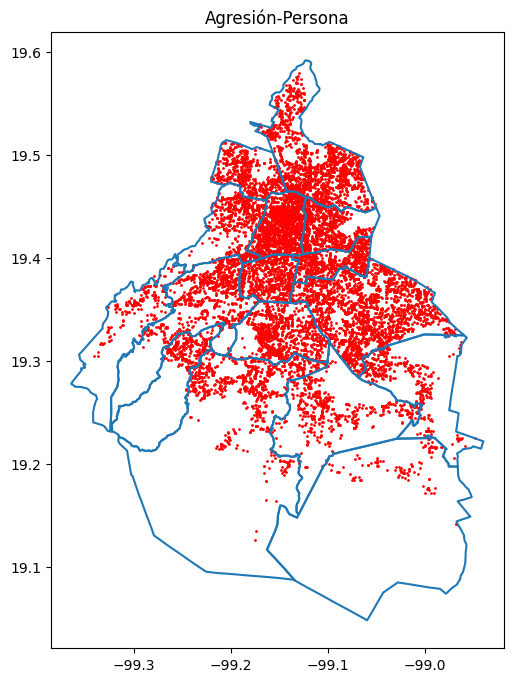

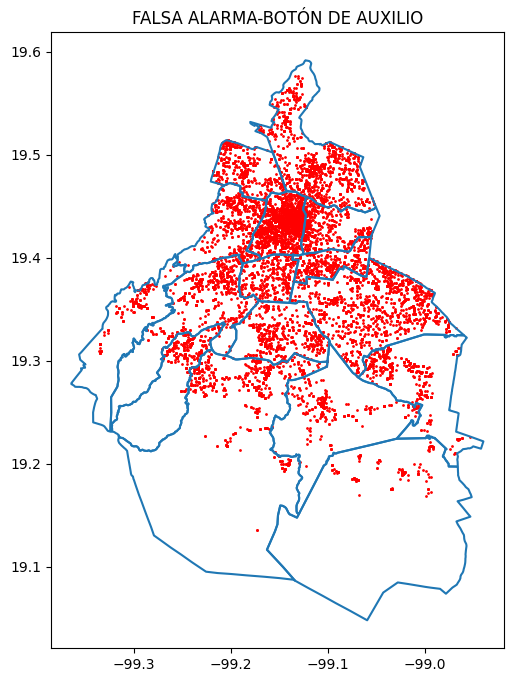

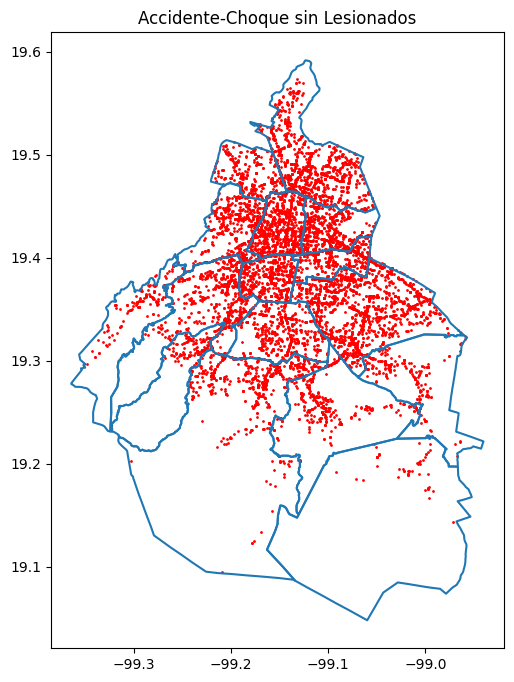

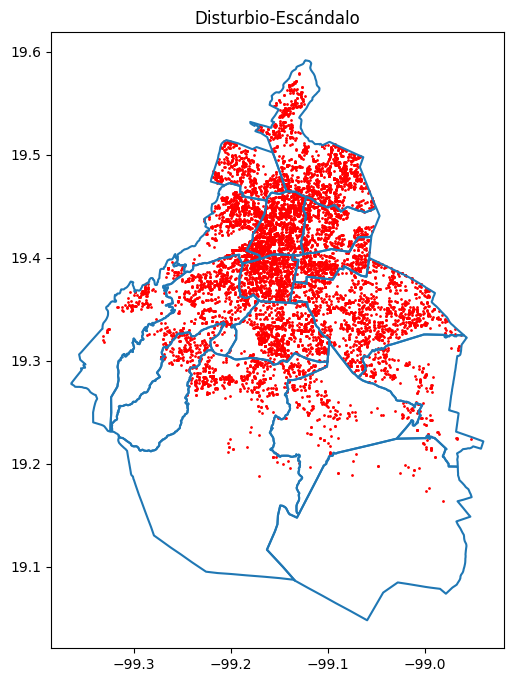

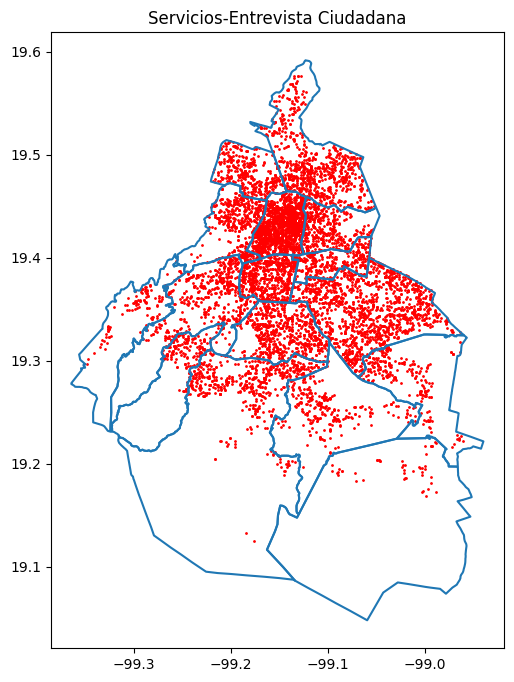

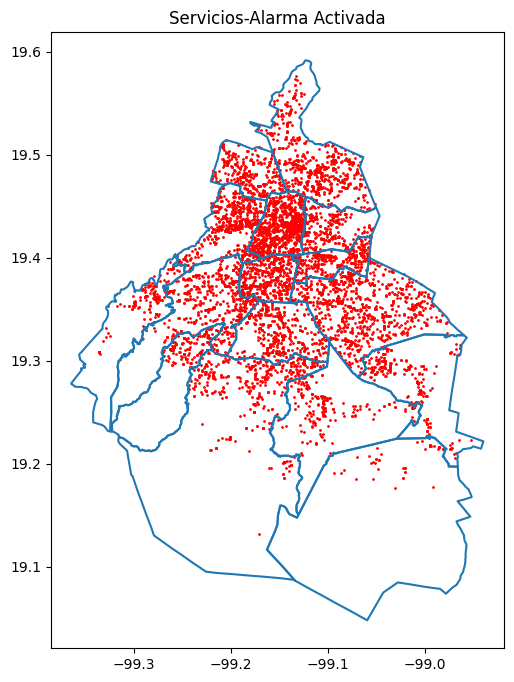

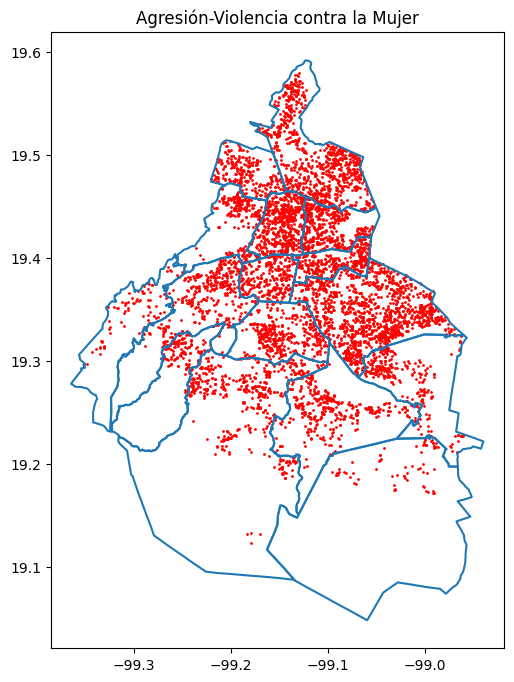

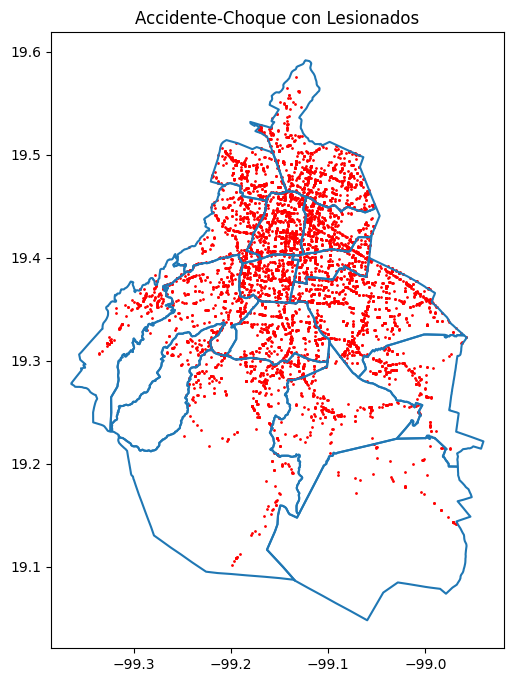

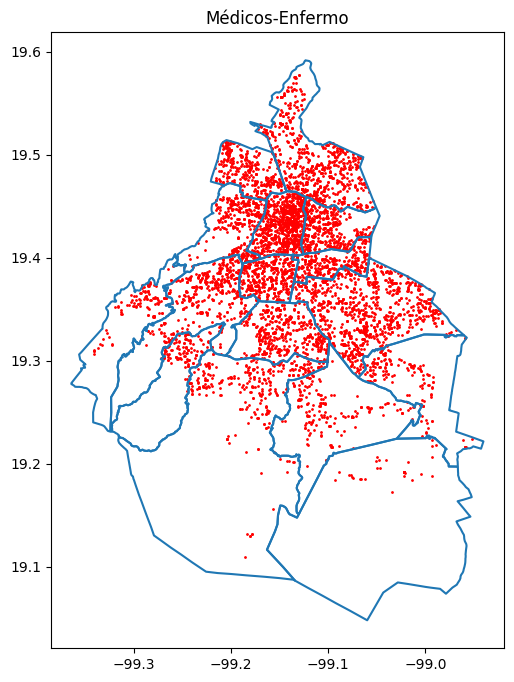

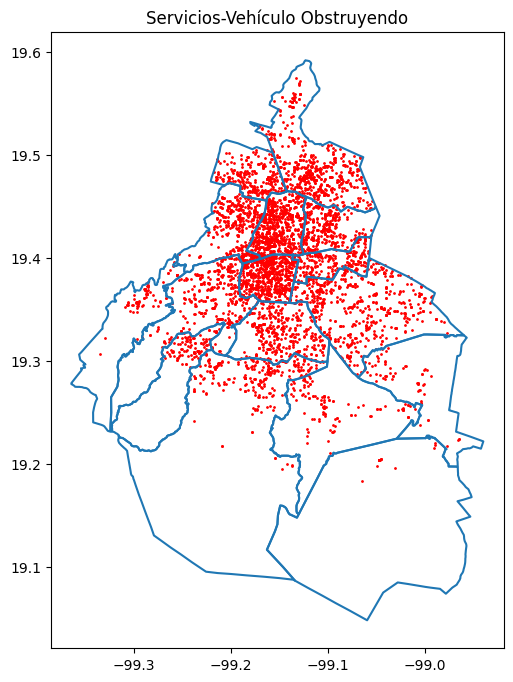

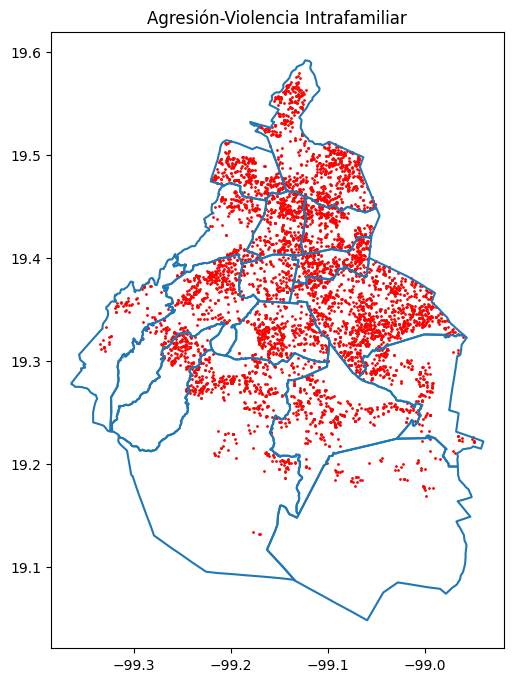

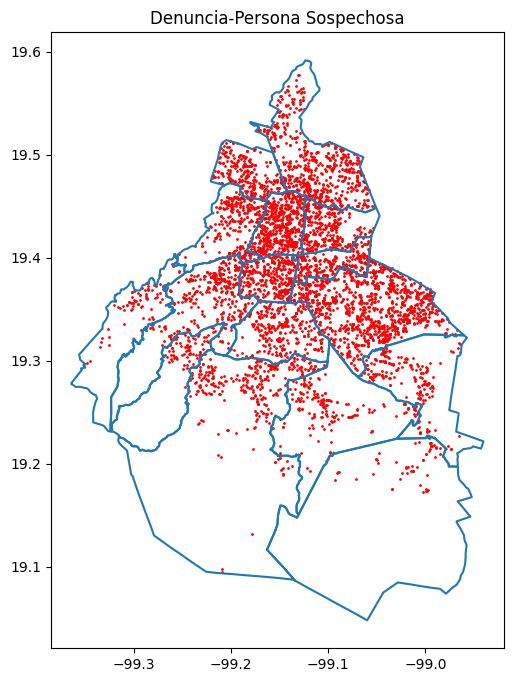

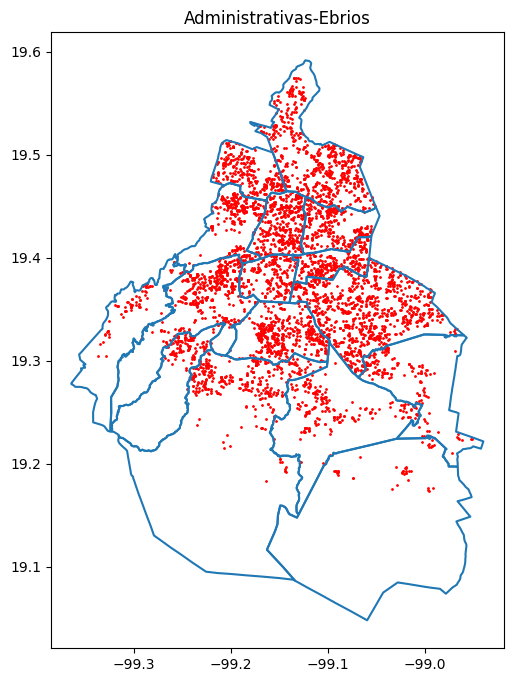

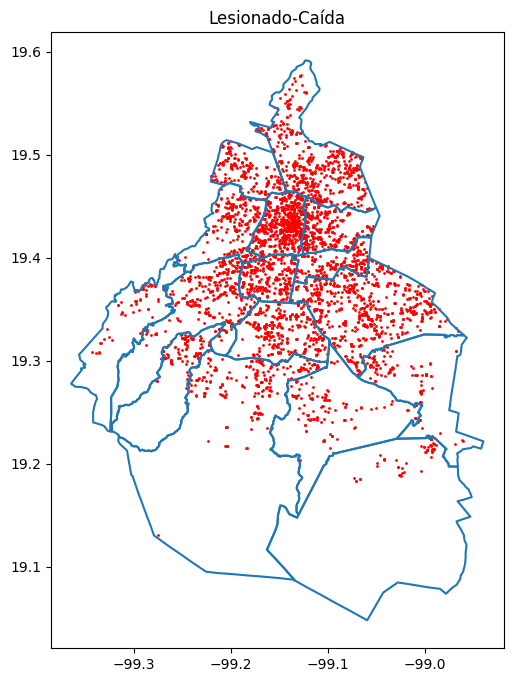

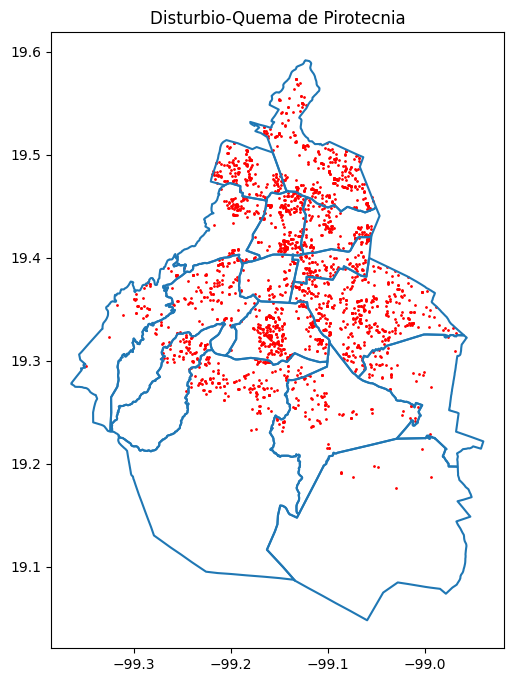

In [9]:
# install geopandas with conda using: conda install -c conda-forge geopandas
# Create map of mexico city using latitude and longitude of all rows of the dataframe using geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

# only rows with indicente_c4 in []

for df_type in df_list[:15]:

        # Obtain the map of Mexico
        mx = gpd.read_file('mapa_mexico/')\
                .set_index('CLAVE')\
                .to_crs(epsg=4326)

        # Coordinate reference system : WGS84
        crs = {'init': 'epsg:4326'}

        # obtain the map of Mexico City with the geometry of the city
        mxcity = mx.query('CVE_EDO==\"09\"')
        #print(mxcity.head())
        fig, ax = plt.subplots()
        # cmap to empty to avoid the color of the map
        mxcity.boundary.plot(ax=ax)
        fig.set_size_inches(12, 8)

        # set title with df incidente_c4
        ax.set_title(df_type['incidente_c4'].unique()[0])


        # Create a new column with the geometry of the points
        df_type['geometry'] = df_type.apply(lambda x: Point(x['longitud'], x['latitud']), axis=1)
        # Create a new dataframe with the geometry of the points
        gdf = gpd.GeoDataFrame(df_type, crs=crs, geometry='geometry')
        # Plot the points
        gdf.plot(ax=ax, color='red', markersize=1)
        fig.set_size_inches(12, 8)
        plt.savefig('{}.png'.format(df_type['incidente_c4'].unique()[0]))
        #plt.show()